# Data Science Project
## Loan Prediction - Data Analysis & Predictive Modeling

**Project Prepared by:** Diaa Aldein Alsayed Ibrahim Osman  
**Prepared for:** Epsilon AI Institute  

**Background:**  

Dream Housing Finance company deals in all kinds of home loans and has a presence across all urban, semi-urban, and rural areas. Customers first apply for a home loan, after which the company validates their eligibility. The company aims to automate the loan eligibility process in real-time based on customer details provided while filling the online application form. These details include Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To achieve automation, they have provided a dataset to identify customer segments eligible for loan amounts, allowing them to specifically target these customers.

**Project Objective:** 

Analyze the data to gain key insights into the factors affecting loan eligibility and create a predictive model to automate the loan eligibility process.

**Dataset Description:** 

The dataset comprises 614 instances and 13 features. The data is unclean, with missing values, and not all instances and features may be necessary to achieve the project's goals.

**Features Description:** 

 1.   **Loan_ID:**                Unique Loan ID                                    614 non-null    object 
 2.   **Gender:**                 Male / Female                                     601 non-null    object 
 3.   **Married:**                Applicant married (Y/N)                           611 non-null    object 
 4.   **Dependents:**             Number of dependents                              599 non-null    object 
 5.   **Education:**              Applicant Education (Graduate/Under Graduate)     614 non-null    object 
 6.   **Self_Employed:**          Self_Employed (Y/N)                               582 non-null    object 
 7.   **ApplicantIncome:**        Applicant income                                  614 non-null    int64  
 8.   **CoapplicantIncome:**      Coapplicant income                                614 non-null    float64
 9.   **LoanAmount:**             Loan amount in thousands                          592 non-null    float64
 10.  **Loan_Amount_Term:**       Term of loan in Months                            600 non-null    float64
 11.  **Credit_History:**         Credit history meet guidelines                    564 non-null    float64
 12.  **Property_Area:**          Urban/Semi Urban/Rural                            614 non-null    object 
 13.  **Loan_Status:**            (Target) Loan approved (Y/N)                      614 non-null    object 


## Step 1: Cleaning

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading & veiwing the dataset
df = pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Geitting Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
#checking for missing data percentage
df.isnull().sum()/df.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

* As the data contain only 614 rows we are going to keep all null values and deal with it in the preprocessing step.

In [6]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Checking features for strange values

In [7]:
# Gender:
df.Gender.value_counts() # Looks Good

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
# Married:
df.Married.value_counts() # Looks Good

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
# Dependents:
df.Dependents.value_counts() 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

* There is strange values as 3+ indicating 3 or more dependets we are going to remove + signs leave only 3 to indicate 3 or more dependents. Also change the data type to float as it contain Null vlaue. to help in feature engineering.

In [10]:
df.Dependents = df.Dependents.replace("3+","3").astype("float")

In [11]:
# checking after dealing with strange values and data type
df.Dependents.value_counts() 

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [12]:
# Education:
df.Education.value_counts() # Looks Good

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
# Self_Employed:
df.Self_Employed.value_counts() # Looks Good

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
# ApplicantIncome:
df.ApplicantIncome.unique() # Looks Good

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [15]:
# CoapplicantIncome:
df.CoapplicantIncome.unique() # Looks Good

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [16]:
# LoanAmount: 
df.LoanAmount.unique() # Looks Good

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [17]:
# Loan_Amount_Term:
df.Loan_Amount_Term.value_counts() # Looks Good

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
# Credit_History: 
df.Credit_History.unique() # Looks Good

array([ 1.,  0., nan])

In [19]:
# Property_Area:
df.Property_Area.unique() # Looks Good

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [20]:
# Loan_Status:
df.Loan_Status.value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

* Although loan status looks good but I am going to change 'Y' to 1 and 'N' to 0 to help in calculating the impact of each feature on the acceptance rate in the analysis step.

In [21]:
df.Loan_Status = df.Loan_Status.replace(['Y','N'],[1,0]).astype('int')

In [22]:
# checking Loan_Status
df.Loan_Status.value_counts() 

1    422
0    192
Name: Loan_Status, dtype: int64

## Step 2: Feature Engineering

We can create new features as follows:

1. Income per Dependent: By dividing ApplicantIncome by the number of Dependents + 1 to include the applicant, which can be useful for assessing the financial stability and capability of the household to repay loans or manage expenses.

2. Total Income: (ApplicantIncome + CoapplicantIncome) to assess the household's total financial strength.

3. Binning: Binning (ApplicantIncome, CoapplicantIncome, total income, and LoanAmount) into categories based on predefined thresholds (e.g., small, medium, large).

4. Loan_Amount_Term_category: by appling function for (Short, Medium, Long) Loan amount term.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 60.1+ KB


In [24]:
# Creating Income_per_Dependent feature
df['Income_per_Dependent'] = df.ApplicantIncome/(df.Dependents + 1)

In [25]:
# Creating total income feature
df['total_income'] = df.ApplicantIncome + df.CoapplicantIncome

In [26]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income_per_Dependent,total_income
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,599.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,3799.442126,7024.705081
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,4344.621637,6458.663872
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,70.000000,1442.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,1704.250000,4166.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,2718.000000,5416.500000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,4300.000000,7521.750000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,63337.000000,81000.000000


In [27]:
# Creating ApplicantIncome_category
# Define thresholds for binning
thresholds = [0, 2877, 5795, float('inf')] # float('inf') indicate infinety as upper value
# Define labels for the bins
labels = ['Small', 'Medium', 'Large']
# Create a new column 'ApplicantIncome_category' to store the bin categories
df['ApplicantIncome_category'] = pd.cut(df['ApplicantIncome'], bins=thresholds, labels=labels,right=False).astype('object') # right=False to include boundery bin value to the left category
df['ApplicantIncome_category'].value_counts()

Medium    306
Large     154
Small     154
Name: ApplicantIncome_category, dtype: int64

In [28]:
# Creating CoapplicantIncome_category
# Define thresholds for binning
thresholds = [0, 1188, 2297, float('inf')] # float('inf') indicate infinety as upper value
# Create a new column 'CoapplicantIncome_category' to store the bin categories
df['CoapplicantIncome_category'] = pd.cut(df['CoapplicantIncome'], bins=thresholds, labels=labels,right=False).astype('object') # right=False to include boundery bin value to the left category
df['CoapplicantIncome_category'].value_counts()

Small     307
Large     154
Medium    153
Name: CoapplicantIncome_category, dtype: int64

In [29]:
# Creating total_income_category
# Define thresholds for binning
thresholds = [0, 4166, 7521, float('inf')] # float('inf') indicate infinety as upper value
# Create a new column 'total_income_category' to store the bin categories
df['total_income_category'] = pd.cut(df['total_income'], bins=thresholds, labels=labels,right=False).astype('object') # right=False to include boundery bin value to the left category
df['total_income_category'].value_counts()

Medium    308
Large     154
Small     152
Name: total_income_category, dtype: int64

In [30]:
# Creating LoanAmount_category
# Define thresholds for binning
thresholds = [0, 100, 168, float('inf')] # float('inf') indicate infinety as upper value
# Create a new column 'LoanAmount_category' to store the bin categories
df['LoanAmount_category'] = pd.cut(df['LoanAmount'], bins=thresholds, labels=labels,right=False).astype('object') # right=False to include boundery bin value to the left category
df['LoanAmount_category'].value_counts()

Medium    304
Large     149
Small     139
Name: LoanAmount_category, dtype: int64

In [31]:
# Function to categorize loan terms
def categorize_loan_term(term):
    if term <= 180:
        return 'Short'
    elif term <= 360:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to create the Loan_Amount_Term_category column
df['Loan_Amount_Term_category'] = df['Loan_Amount_Term'].apply(categorize_loan_term)
df['Loan_Amount_Term_category'].value_counts()

Medium    529
Short      56
Long       29
Name: Loan_Amount_Term_category, dtype: int64

## Step 3: Analysis
1. Statistical analysis:
Explore important numerical and categorical features statistics in the data sets.
2. Correlation & Correlation Heatmap:
To uncover correlations between features and the extent of their relationships.
3. Analysis and visualization:
- Univariate analysis: Explores the distribution ratio of each feature within the dataset.
- Bivariate analysis: Investigates the impact of each feature on the loan acceptance status.

### 1. Statistical analysis:

In [32]:
# statistcal description for numeric features
round(df.describe(),2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income_per_Dependent,total_income
count,599.00,614.00,614.00,592.00,600.00,564.00,614.00,599.00,614.00
mean,0.76,5403.46,1621.25,146.41,342.00,0.84,0.69,3799.44,7024.71
std,1.02,6109.04,2926.25,85.59,65.12,0.36,0.46,4344.62,6458.66
min,0.00,150.00,0.00,9.00,12.00,0.00,0.00,70.00,1442.00
25%,0.00,2877.50,0.00,100.00,360.00,1.00,0.00,1704.25,4166.00
50%,0.00,3812.50,1188.50,128.00,360.00,1.00,1.00,2718.00,5416.50
75%,2.00,5795.00,2297.25,168.00,360.00,1.00,1.00,4300.00,7521.75
max,3.00,81000.00,41667.00,700.00,480.00,1.00,1.00,63337.00,81000.00


In [33]:
# statistcal description for categorical features
df.describe(include="O")

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,ApplicantIncome_category,CoapplicantIncome_category,total_income_category,LoanAmount_category,Loan_Amount_Term_category
count,614,601,611,614,582,614,614,614,614,592,614
unique,614,2,2,2,2,3,3,3,3,3,3
top,LP001002,Male,Yes,Graduate,No,Semiurban,Medium,Small,Medium,Medium,Medium
freq,1,489,398,480,500,233,306,307,308,304,529


* **First Statistical Description for Numeric Features:** 

    1. **Dependents:** Ranges from **0** to **3**, as the median 50% = 0 indicate that most of the applicant have no dependents. 

    2. **ApplicantIncome:** Ranges from **150** to **81000**, The mean income is **5403.46**, and the median is **3812.50**. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper ApplicantIncome values.

    3. **CoapplicantIncome:** Ranges from **0** indicate no CoapplicantIncome provided to **41667**. The mean CoapplicantIncome is **1621.25**, and the median is **1188.50**. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper CoapplicantIncome values.
        
    4. **LoanAmount:** Ranges from **9,000** to **700,000**. The mean LoanAmount is **146,410**, and the median is **128,000**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper LoanAmount values.
    
    5. **Loan_Amount_Term:** Ranges from **12** to **480** Months. As Q1 = Q2 = Q3 = 360 indicate that most of Loan_Amount_Term in the data is 360 Months.
    
    6. **Credit_History:** Ranges from **0** to **1**, 0 referring to applicant Not meets guidelines and 1 Yes applicant Credit history meets guidelines. The mean of Credit_History is **0.84**, indicating that **84%** of the applicant in the data set their Credit history meet the guidelines.
    
    7. **Loan_Status:** Ranges from **0** to **1**, 0 referring to applicant Loan status rejected and 1 Yes applicant applicant Loan status approved or accepted. The mean of Loan_Status is **0.69**, indicating that **69%** of the applicant in the data set their Loan_Status approved or accepted.
    
    8. **Income_per_Dependent:** Ranges from **70** to **63337**, The mean income is **3799.44**, and the median is **2718**. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper Income_per_Dependent values.
    
    9. **total_income:** Ranges from **1442.** to **81000**, The mean total income is **7024.71**, and the median is **5416.50**. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper total_income values.
    
---

* **Second Statistical Description for Categorical Features:**
    1. **Gender:** Out of **2** unique Gender, the most frequented Gender is **Male**, which has **489** values out of 601 total applicant Male and Female.

    2. **Married:** Out of **2** unique applicants Married status, the most frequented Married status is **Yes**, which has **398** out of 611 total Married status.

    3. **Education:** Out of **2** unique applicants Education status, the most frequented Education status is **Graduate**, which has **480** values out of the 614 total Education status (Graduate/Under Graduate).

    4. **Self_Employed:** Out of **2** unique Self_Employed status, the most frequented status is **No**, which is repeated **500** times out of the 582 total Self_Employed status  (Yes/No). indicate that most of the applicant are employees.

    5. **Property_Area:** Out of **3** unique Property_Area, the most frequented Property_Area is **Semiurban**, with **233** occurrences out of the 614 total applicants.

    6. **ApplicantIncome_category:** Out of **3** unique ApplicantIncome_category, the most frequented is **Medium**, with **306** occurrences out of the 614 total applicants.

    7. **CoapplicantIncome_category:** Out of **3** unique CoapplicantIncome_category, the most frequented is **Small**, with **307** occurrences out of the 614 total applicants.
    
    8. **total_income_category:** Out of **3** unique total_income_category, the most frequented is **Medium**, with **308** occurrences out of the 614 total applicants.
    
    9. **LoanAmount_category:** Out of **3** unique total_income_category, the most frequented is **Medium**, with **304** occurrences out of the 614 total applicants.
    
    10. **Loan_Amount_Term_category:** Out of **3** unique Loan_Amount_Term_category, the most frequented is **Medium**, with **529** occurrences out of the 614 total applicants.

## 2. Correlation & Correlation Heatmap:

In [34]:
# Correlation show the relationship between features.
correlation_matrix = round(df.corr(),2)
correlation_matrix

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income_per_Dependent,total_income
Dependents,1.00,0.12,0.03,0.16,-0.10,-0.05,0.01,-0.29,0.12
ApplicantIncome,0.12,1.00,-0.12,0.57,-0.05,-0.01,-0.00,0.78,0.89
CoapplicantIncome,0.03,-0.12,1.00,0.19,-0.06,-0.00,-0.06,-0.10,0.34
LoanAmount,0.16,0.57,0.19,1.00,0.04,-0.01,-0.04,0.44,0.62
Loan_Amount_Term,-0.10,-0.05,-0.06,0.04,1.00,0.00,-0.02,-0.01,-0.07
Credit_History,-0.05,-0.01,-0.00,-0.01,0.00,1.00,0.56,0.03,-0.02
Loan_Status,0.01,-0.00,-0.06,-0.04,-0.02,0.56,1.00,-0.02,-0.03
Income_per_Dependent,-0.29,0.78,-0.10,0.44,-0.01,0.03,-0.02,1.00,0.69
total_income,0.12,0.89,0.34,0.62,-0.07,-0.02,-0.03,0.69,1.00


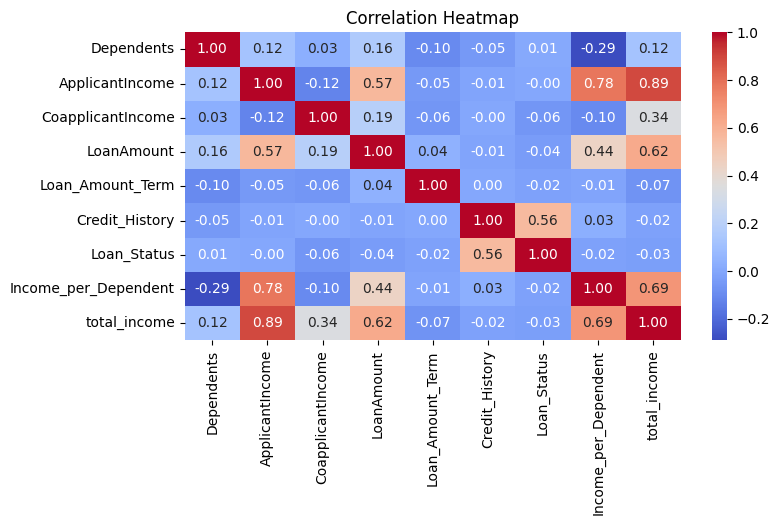

In [35]:
# heatmap visualize the correlation 
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Analysis Summary

**1. Positive Correlations:**

There is a moderate positive correlation (0.57) between 'ApplicantIncome' and 'LoanAmount', indicating that higher applicant incomes tend to be associated with larger loan amounts.
'Total_income' also shows a strong positive correlation (0.89) with 'ApplicantIncome', which is expected since total income includes applicant income.
'LoanAmount' and 'total_income' also exhibit a strong positive correlation of 0.62, suggesting that higher total incomes are associated with larger loan amounts.

**2. Negative Correlations:**

There is a week negative correlation (-0.29) between 'Income_per_Dependent' and 'Dependents', implying that as income per dependent increases, the number of dependents tends to decrease.
'Loan_Amount_Term' shows a slight negative correlation (-0.10) with 'Dependents', indicating a weak association between loan term and the number of dependents.

**3. Correlation with 'Loan_Status':**

'Loan_Status' has a moderate positive correlation (0.56) with 'Credit_History', suggesting that a good credit history is positively associated with loan approval status.
Other features like 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'total_income', and 'Income_per_Dependent' have weaker correlations with 'Loan_Status', suggesting they might have less direct influence on loan approval decisions.

*Note: Correlation does not imply causation, and these interpretations are based on the observed associations in the data.*

## 3. Analysis and visualization
## - Univariate analysis: Explores the distribution ratio of each feature within the dataset.

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_per_Dependent,total_income,ApplicantIncome_category,CoapplicantIncome_category,total_income_category,LoanAmount_category,Loan_Amount_Term_category
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0,5849.0,Large,Small,Medium,NaN,Medium
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,2291.5,6091.0,Medium,Medium,Medium,Medium,Medium
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,3000.0,Medium,Small,Small,Small,Medium
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,2583.0,4941.0,Small,Large,Medium,Medium,Medium
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,6000.0,Large,Small,Medium,Medium,Medium


In [37]:
# 1. What is the percentage distribution of gender in the dataset?
gender_dist = df.Gender.value_counts()
gender_dist 

Male      489
Female    112
Name: Gender, dtype: int64

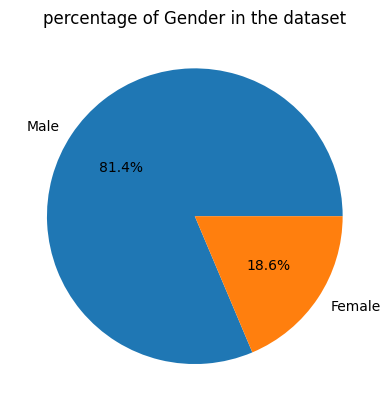

In [38]:
# pie chart show the percentage of Gender in dataset
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%')
plt.title('percentage of Gender in the dataset')
plt.show()

* 81.4 % of applicant in the data set are Male

In [39]:
# 2. What is the percentage distribution of Married status in the dataset?
married_dist = df.Married.value_counts()
married_dist 

Yes    398
No     213
Name: Married, dtype: int64

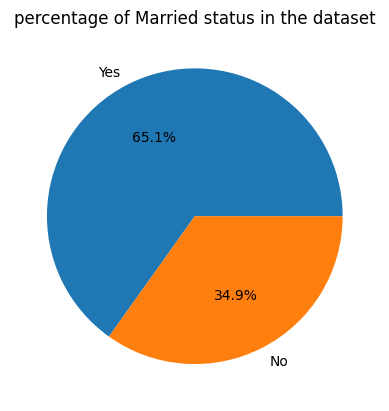

In [40]:
# pie chart show the percentage of Married status in dataset
plt.pie(married_dist, labels=married_dist.index, autopct='%1.1f%%')
plt.title('percentage of Married status in the dataset')
plt.show()

* 65.1 % are Married applicant in the dataset

In [41]:
# 3. What is the percentage distribution of Dependents in the dataset?
dependent_dist = df.Dependents.value_counts()/df.shape[0] * 100
dependent_dist

0.0    56.188925
1.0    16.612378
2.0    16.449511
3.0     8.306189
Name: Dependents, dtype: float64

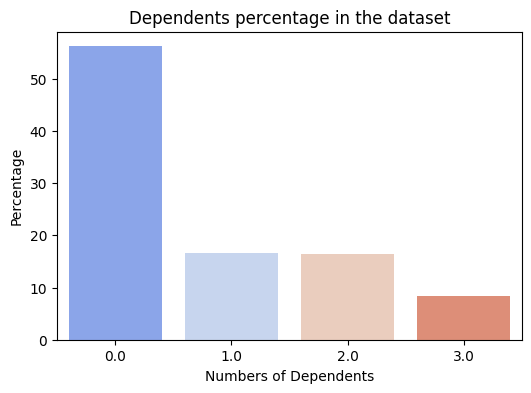

In [42]:
# Barplot chart Reflect the percentage distribution of Dependents in the dataset.
plt.figure(figsize=(6, 4))
sns.barplot(x = dependent_dist.index, y = dependent_dist.values, palette='coolwarm')
plt.ylabel('Percentage')
plt.xlabel('Numbers of Dependents')
plt.title('Dependents percentage in the dataset')
plt.show()

* Most of applicant 56.18 % have no Dependents, 16.6 % have only one Dependent, 16.4 % have 2, and 8.3 % have 3 or more Dependents.

In [43]:
# 4. What is the percentage distribution of Education status in the dataset?
education_dist = df.Education.value_counts()
education_dist

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

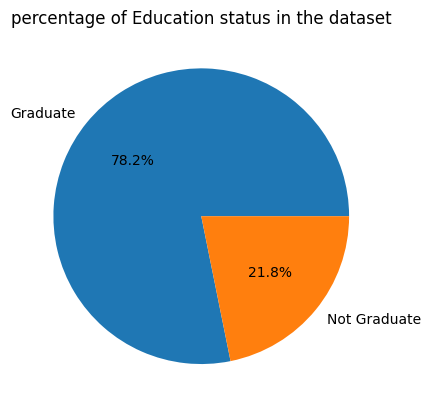

In [44]:
# pie chart show the percentage of Education status in dataset
plt.pie(education_dist, labels=education_dist.index, autopct='%1.1f%%')
plt.title('percentage of Education status in the dataset')
plt.show()

* 78.2 % of applicant are Graduate, and 21.8 % Not Graduate

In [45]:
# 5. What is the percentage distribution of Self_Employed status in the dataset?
self_employ_dist = df.Self_Employed.value_counts()
self_employ_dist

No     500
Yes     82
Name: Self_Employed, dtype: int64

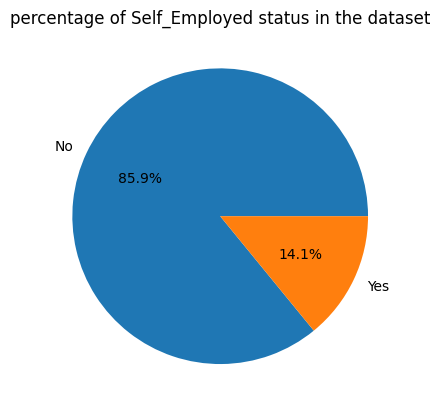

In [46]:
# pie chart show the percentage of Self_Employed status in dataset
plt.pie(self_employ_dist, labels=self_employ_dist.index, autopct='%1.1f%%')
plt.title('percentage of Self_Employed status in the dataset')
plt.show()

* Only 14.1 % are self employed and the majority 85.9 % are employee.

In [47]:
# 6. What is the percentage distribution of ApplicantIncome_category in the dataset?
appl_income_dist = df.ApplicantIncome_category.value_counts()/df.shape[0] * 100
appl_income_dist

Medium    49.837134
Large     25.081433
Small     25.081433
Name: ApplicantIncome_category, dtype: float64

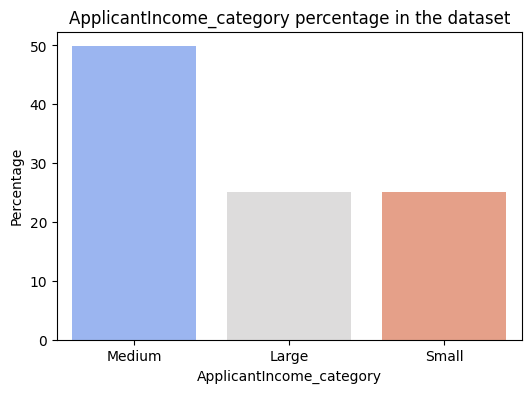

In [48]:
# Barplot chart Reflect the percentage distribution of ApplicantIncome_category in the dataset.
plt.figure(figsize=(6, 4))
sns.barplot(x = appl_income_dist.index, y = appl_income_dist.values, palette='coolwarm')
plt.ylabel('Percentage')
plt.xlabel('ApplicantIncome_category')
plt.title('ApplicantIncome_category percentage in the dataset')
plt.show()

* Almost 50 % of Medium ApplicantIncome_category represented in the dataset.

In [49]:
# 7. What is the percentage distribution of CoapplicantIncome_category in the dataset?
CoapplicantIncome_cat_dist = df.CoapplicantIncome_category.value_counts()/df.shape[0] * 100
CoapplicantIncome_cat_dist 

Small     50.000000
Large     25.081433
Medium    24.918567
Name: CoapplicantIncome_category, dtype: float64

In [50]:
# checking CoapplicantIncome feature value counts.
df.CoapplicantIncome.value_counts().sort_values(ascending=False)

0.0       273
2083.0      5
1666.0      5
2500.0      5
1625.0      3
         ... 
2087.0      1
1664.0      1
3683.0      1
2079.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

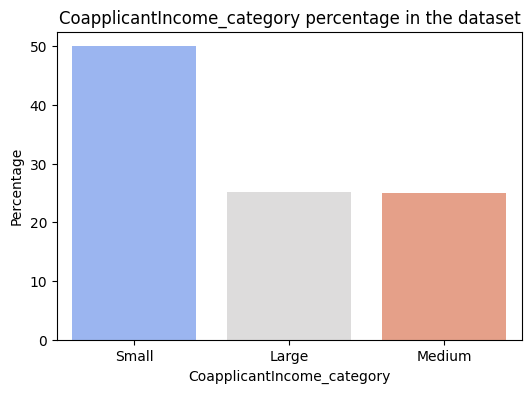

In [51]:
# Barplot chart Reflect the percentage distribution of CoapplicantIncome_category in the dataset.
plt.figure(figsize=(6, 4))
sns.barplot(x = CoapplicantIncome_cat_dist.index, y = CoapplicantIncome_cat_dist.values, palette='coolwarm')
plt.ylabel('Percentage')
plt.xlabel('CoapplicantIncome_category')
plt.title('CoapplicantIncome_category percentage in the dataset')
plt.show()

* Small CoapplicantIncome Category represents 50% of the dataset, as a high percentage of applicants have no CoapplicantIncome, represented by 0 in the CoapplicantIncome feature.

In [52]:
# 8. What is the percentage distribution of LoanAmount_category in the dataset?
LoanAmount_cat_dist = df.LoanAmount_category.value_counts()/df.shape[0] * 100
LoanAmount_cat_dist 

Medium    49.511401
Large     24.267101
Small     22.638436
Name: LoanAmount_category, dtype: float64

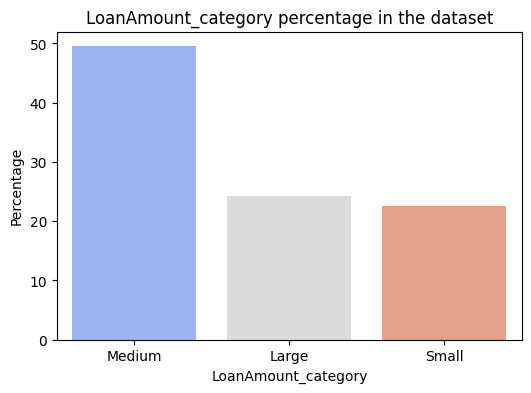

In [53]:
# Barplot chart Reflect the percentage distribution of LoanAmount_category in the dataset.
plt.figure(figsize=(6, 4))
sns.barplot(x = LoanAmount_cat_dist .index, y = LoanAmount_cat_dist.values, palette='coolwarm')
plt.ylabel('Percentage')
plt.xlabel('LoanAmount_category')
plt.title('LoanAmount_category percentage in the dataset')
plt.show()

* Almost 50 % of Medium LoanAmount_category represented in the dataset.

In [54]:
# 9. What is the percentage distribution of Loan_Amount_Term in the dataset?
Loan_Amount_Term_dist = df.Loan_Amount_Term.value_counts()/df.shape[0] * 100
Loan_Amount_Term_dist

360.0    83.387622
180.0     7.166124
480.0     2.442997
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: Loan_Amount_Term, dtype: float64

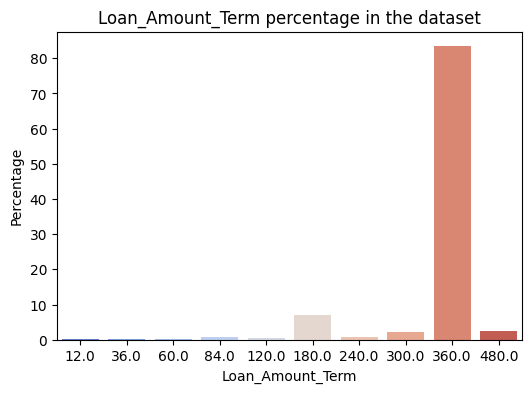

In [55]:
# Barplot chart Reflect the percentage distribution of Loan_Amount_Term in the dataset.
plt.figure(figsize=(6, 4))
sns.barplot(x = Loan_Amount_Term_dist.index, y = Loan_Amount_Term_dist.values, palette='coolwarm')
plt.ylabel('Percentage')
plt.xlabel('Loan_Amount_Term')
plt.title('Loan_Amount_Term percentage in the dataset')
plt.show()

* The majority of loans have a term of 360 months (or 30 years), representing 83.39% of the dataset. Shorter-term loans of 180 months (or 15 years) account for 7.17%, while longer-term loans of 480 months (or 40 years) represent 2.44%. This distribution suggests that most loans in the dataset have standard 30-year terms, with fewer loans falling into shorter or longer-term categories.

In [56]:
Loan_Amount_Term_category_dist = df.Loan_Amount_Term_category.value_counts()/df.shape[0] * 100
Loan_Amount_Term_category_dist

Medium    86.156352
Short      9.120521
Long       4.723127
Name: Loan_Amount_Term_category, dtype: float64

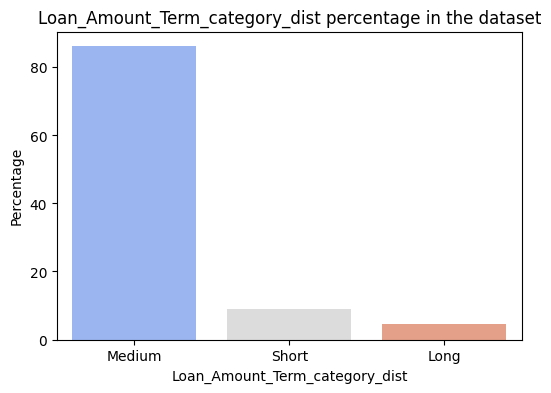

In [57]:
# Barplot chart Reflect the percentage distribution of Loan_Amount_Term in the dataset.
plt.figure(figsize=(6, 4))
sns.barplot(x = Loan_Amount_Term_category_dist.index, y = Loan_Amount_Term_category_dist.values, palette='coolwarm')
plt.ylabel('Percentage')
plt.xlabel('Loan_Amount_Term_category_dist')
plt.title('Loan_Amount_Term_category_dist percentage in the dataset')
plt.show()

In [58]:
# 10. What is the percentage distribution of Credit_History in the dataset?
Credit_History_dist = df.Credit_History.value_counts()
Credit_History_dist

1.0    475
0.0     89
Name: Credit_History, dtype: int64

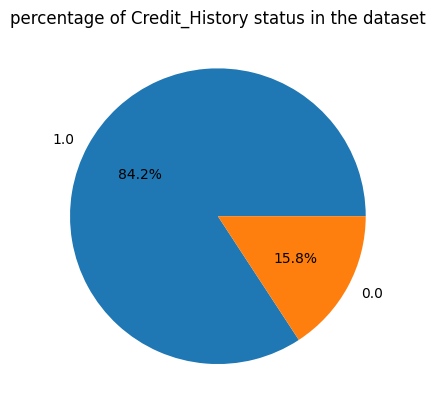

In [59]:
# pie chart show the percentage of Credit_History status in dataset
plt.pie(Credit_History_dist, labels=Credit_History_dist.index, autopct='%1.1f%%')
plt.title('percentage of Credit_History status in the dataset')
plt.show()

* 84.2% of applicants with Credit_History in the dataset meet the guidelines, while 15.8% do not meet the guidelines.

In [60]:
# 11. What is the percentage distribution of Property_Area in the dataset?
Property_Area_dist = df.Property_Area.value_counts()/df.shape[0] * 100
Property_Area_dist

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

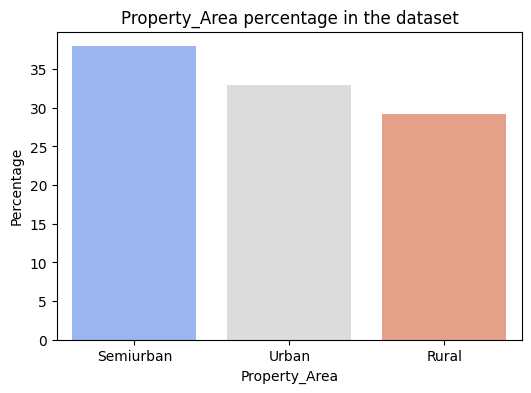

In [61]:
# Barplot chart Reflect the percentage distribution of Property_Area in the dataset.
plt.figure(figsize=(6, 4))
sns.barplot(x = Property_Area_dist.index, y = Property_Area_dist.values, palette='coolwarm')
plt.ylabel('Percentage')
plt.xlabel('Property_Area')
plt.title('Property_Area percentage in the dataset')
plt.show()

* The semi-urban areas have the highest representation at 37.95%, followed by urban areas at 32.90%, and rural areas at 29.15%. This suggests that the dataset contains a diverse representation of property areas, with a slightly higher proportion of semi-urban properties compared to urban and rural areas.

In [62]:
# 12. What is the percentage distribution of Loan_Status in the dataset?
Loan_Status_dist = df.Loan_Status.value_counts()
Loan_Status_dist

1    422
0    192
Name: Loan_Status, dtype: int64

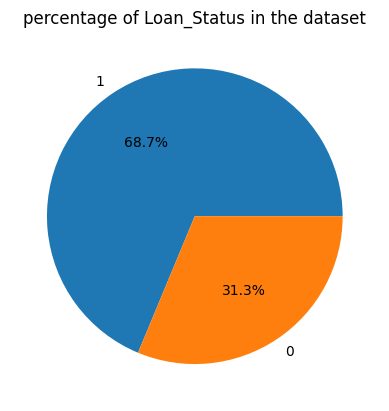

In [63]:
# pie chart show the percentage of Loan_Status in dataset
plt.pie(Loan_Status_dist, labels=Loan_Status_dist.index, autopct='%1.1f%%')
plt.title('percentage of Loan_Status in the dataset')
plt.show()

* 68.73% of loans were approved (denoted by '1'), while 31.27% were not approved (denoted by '0'). This suggests that a significantly higher proportion of loans in the dataset were approved compared to those that were not approved. 
* Additionally, the imbalance in Loan_Status, where approvals dominate the dataset, highlights the highly imbalanced class nature of this target feature.

## - Bivariate analysis: Investigates the impact of each feature on the loan acceptance status.

In [64]:
# 1. What is the impact of Gender on Loan_Status?
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [65]:
# Getting loan_Status rate by each level of Gender to determine which level have greater effect on Loan acceptance.
Loan_Status_by_gender = df.groupby("Gender")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_gender

Gender
Male      0.693252
Female    0.669643
Name: Loan_Status, dtype: float64

* There is no significant impact of gender on loan acceptance, as the acceptance ratio for males is 69.3%, while for females, it is almost 67%.

In [66]:
# 2. What is the impact of Married on Loan_Status?
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [67]:
# Getting loan_Status rate by each level of Married to determine which level have greater effect on Loan acceptance.
Loan_Status_by_Married = df.groupby("Married")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_Married

Married
Yes    0.716080
No     0.629108
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Acceptance Rate by Married Status')

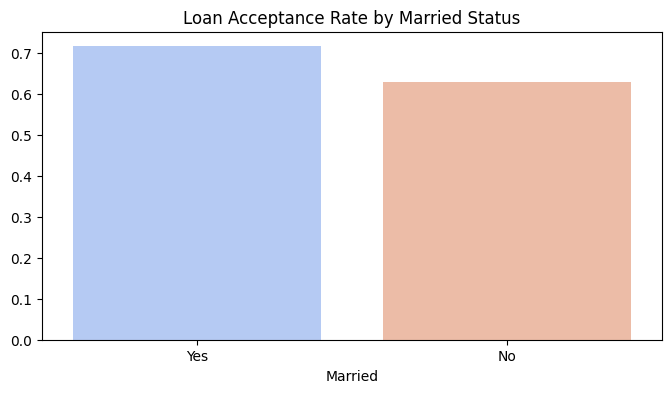

In [68]:
# Barplot graph Reflect the Loan Acceptance Rate by each level of Married Status.
plt.figure(figsize=(8, 4))
sns.barplot(x=Loan_Status_by_Married.index, y=Loan_Status_by_Married.values, palette='coolwarm')
plt.title('Loan Acceptance Rate by Married Status')

* There is a slight tendency to accept married individuals for loans, with an acceptance rate of 71.6%, compared to unmarried individuals, who have an acceptance rate of 62.9%.

In [69]:
# 3. What is the impact of Dependents on Loan_Status?
df.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [70]:
# Getting loan_Status rate by each level of Dependents to determine which level have greater effect on Loan acceptance.
Loan_Status_by_Dependents = df.groupby("Dependents")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_Dependents

Dependents
2.0    0.752475
0.0    0.689855
1.0    0.647059
3.0    0.647059
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Acceptance Rate by Dependents')

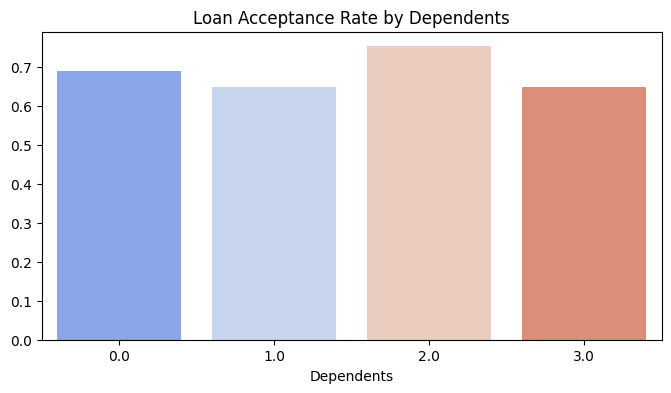

In [71]:
# Barplot graph Reflect the Loan Acceptance Rate by each level of Dependents.
plt.figure(figsize=(8, 4))
sns.barplot(x=Loan_Status_by_Dependents.index, y=Loan_Status_by_Dependents.values, palette='coolwarm')
plt.title('Loan Acceptance Rate by Dependents')

* Applicants with 2 dependents have the highest loan approval rate at 75.25%. Those with no dependents (0) follow closely with a loan approval rate of 68.99%. Individuals with 1 or 3 or more dependents have similar loan approval rates, both at 64.71%.

In [72]:
# Define a custom function to calculate mode
def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else None

# checking why applicants with 2 Dependents have more acceptance rate than applicant with 0, and 1 dependants.
df.groupby("Dependents").agg({'Loan_Status':'mean', 'Property_Area': get_mode , 'Income_per_Dependent':'mean','ApplicantIncome':'mean', 'CoapplicantIncome':'mean', 'total_income':'mean','Credit_History':'mean', 'Loan_Amount_Term':'mean'})

,Loan_Status,Property_Area,Income_per_Dependent,ApplicantIncome,CoapplicantIncome,total_income,Credit_History,Loan_Amount_Term
Dependents,,,,,,,,
0.0,0.689855,Semiurban,4917.423188,4917.423188,1623.696000,6541.119188,0.857595,348.107784
1.0,0.647059,Urban,2981.137255,5962.274510,1426.235294,7388.509804,0.844444,329.346535
2.0,0.752475,Semiurban,1642.260726,4926.782178,1687.245544,6614.027723,0.852632,340.871287
3.0,0.647059,Semiurban,2145.303922,8581.215686,2024.313725,10605.529412,0.770833,325.200000


* Although Applicants with 2 dependents have the lowest Income_per_Dependent it exhibit a higher acceptance rate than those with 0 or 1 dependents, possibly due to their predominantly Semiurban property area than Urban area for 1 dependents, favorable credit history (85.26%) than for 1 dependents, and potentially higher combined total income than 0 dependents.  

In [73]:
# 4. What is the impact of Education on Loan acceptance Status?
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [74]:
# Getting loan_Status rate by each level of Education to determine which level have greater effect on Loan acceptance.
Loan_Status_by_Education = df.groupby("Education")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_Education

Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan status by Education')

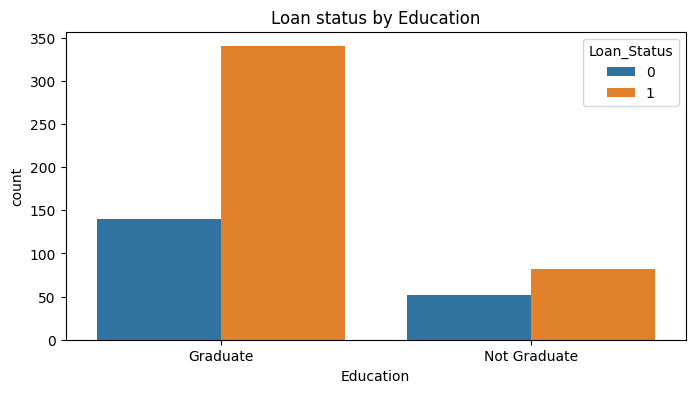

In [75]:
# Count plot graph Reflect the Loan status as hue by each level of Education.
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Education', hue = 'Loan_Status')
plt.title('Loan status by Education')

* Graduates have a higher loan approval rate of 70.83% compared to non-graduates, who have a loan approval rate of 61.19%. This suggests that education level may influence loan approval rates, with graduates generally having a higher likelihood of loan approval compared to non-graduates.

In [76]:
# 5. What is the impact of Self_Employed on Loan acceptance Status?
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [77]:
# Getting loan_Status rate by each level of Education to determine which level have greater effect on Loan acceptance.
Loan_Status_by_Self_Employed = df.groupby("Self_Employed")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_Self_Employed

Self_Employed
No     0.686000
Yes    0.682927
Name: Loan_Status, dtype: float64

* The above ratios indicates that being self-employed or not does not significantly impact the loan approval rate in the dataset.

In [78]:
# 6. What is the impact of ApplicantIncome on Loan acceptance Status?
df.groupby("Loan_Status")['ApplicantIncome'].mean().sort_values(ascending=False)

Loan_Status
0    5446.078125
1    5384.068720
Name: ApplicantIncome, dtype: float64

In [79]:
df.groupby("Loan_Status")['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,192.0,5446.078125,6819.558528,150.0,2885.0,3833.5,5861.25,81000.0
1,422.0,5384.068720,5765.441615,210.0,2877.5,3812.5,5771.50,63337.0


Text(0.5, 1.0, 'ApplicantIncome by loan Status')

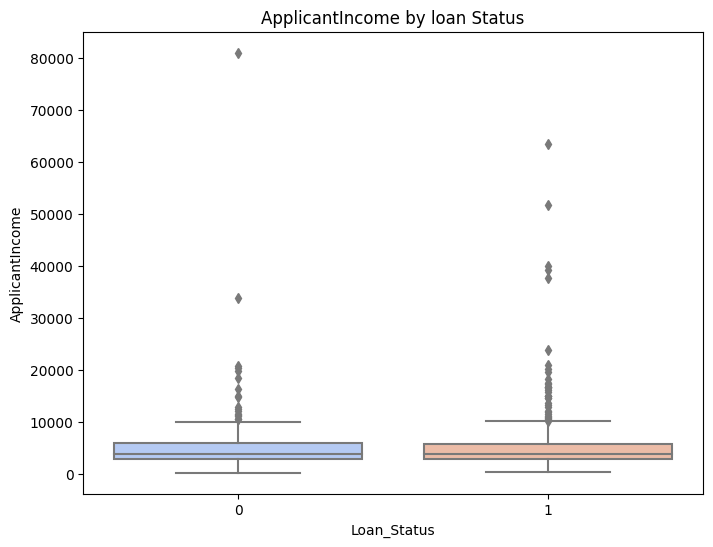

In [80]:
# Boxplot to visualize the ApplicantIncome by Loan acceptance Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='coolwarm')
plt.title('ApplicantIncome by loan Status')

* For individuals whose loans were not approved (Loan_Status = 0), the mean ApplicantIncome is 5446.08, with a standard deviation of 6819.56. The minimum income is 150, while the maximum is 81000.
* In contrast, for those whose loans were approved (Loan_Status = 1), the mean ApplicantIncome is slightly lower at 5384.07, with a standard deviation of 5765.44. The income range spans from 210 to 63337.
* Overall, the mean ApplicantIncome is comparable between the two loan status categories, indicating that ApplicantIncome alone may not be a decisive factor in loan approval.

In [81]:
# 7. What is the impact of ApplicantIncome_category on Loan acceptance Status?
df.ApplicantIncome_category.value_counts()

Medium    306
Large     154
Small     154
Name: ApplicantIncome_category, dtype: int64

In [82]:
# Getting loan_Status rate by each level of ApplicantIncome_category to determine which level have greater effect on Loan acceptance.
Loan_Status_by_ApplicantIncome_category = df.groupby("ApplicantIncome_category")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_ApplicantIncome_category

ApplicantIncome_category
Medium    0.689542
Small     0.688312
Large     0.681818
Name: Loan_Status, dtype: float64

* The above ratios indicates that ApplicantIncome_category alone does not significantly impact the loan approval rate in the dataset.

In [83]:
# 8. What is the impact of CoapplicantIncome_category on Loan acceptance Status?
df.CoapplicantIncome_category.value_counts()

Small     307
Large     154
Medium    153
Name: CoapplicantIncome_category, dtype: int64

In [84]:
# Getting loan_Status rate by each level of CoapplicantIncome_category to determine which level have greater effect on Loan acceptance.
Loan_Status_by_CoapplicantIncome_category = df.groupby("CoapplicantIncome_category")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_CoapplicantIncome_category

CoapplicantIncome_category
Medium    0.705882
Large     0.688312
Small     0.677524
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Acceptance Rate by CoapplicantIncome_category')

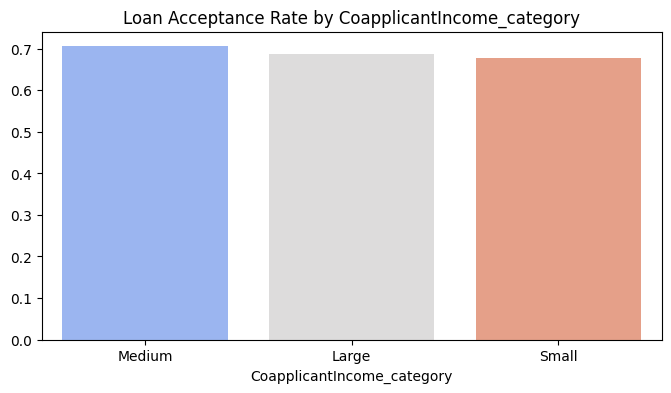

In [85]:
# Barplot graph Reflect the Loan Acceptance Rate by each level of CoapplicantIncome_category.
plt.figure(figsize=(8, 4))
sns.barplot(x=Loan_Status_by_CoapplicantIncome_category.index, y=Loan_Status_by_CoapplicantIncome_category.values, palette='coolwarm')
plt.title('Loan Acceptance Rate by CoapplicantIncome_category')

* The loan approval rates vary across CoapplicantIncome categories: 'Medium' category has the highest rate at 70.59%, followed by 'Large' at 68.83%, and 'Small' at 67.75%. This indicates a potential correlation between CoapplicantIncome levels and loan approval, suggesting that applicants with higher CoapplicantIncome categories tend to have slightly higher approval rates.

In [86]:
# 9. What is the impact of total_income_category on Loan acceptance Status?
df.total_income_category.value_counts()

Medium    308
Large     154
Small     152
Name: total_income_category, dtype: int64

In [87]:
# Getting loan_Status rate by each level of total_income_category to determine which level have greater effect on Loan acceptance.
Loan_Status_by_total_income_category = df.groupby("total_income_category")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_total_income_category

total_income_category
Medium    0.694805
Small     0.684211
Large     0.675325
Name: Loan_Status, dtype: float64

* The above ratios indicates that total_income_category alone does not significantly impact the loan approval rate in the dataset.

In [88]:
# 9. What is the impact of LoanAmount_category on Loan acceptance Status?
df.LoanAmount_category.value_counts()

Medium    304
Large     149
Small     139
Name: LoanAmount_category, dtype: int64

In [89]:
# Getting loan_Status rate by each level of LoanAmount_category to determine which level have greater effect on Loan acceptance.
Loan_Status_by_LoanAmount_category = df.groupby("LoanAmount_category")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_LoanAmount_category

LoanAmount_category
Medium    0.717105
Small     0.690647
Large     0.651007
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan status by LoanAmount_category')

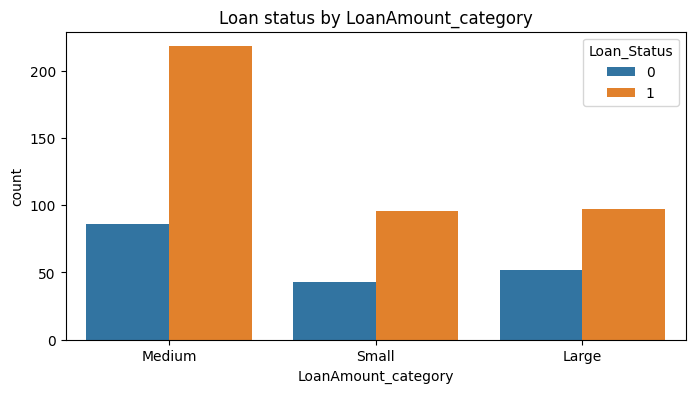

In [90]:
# Count plot graph Reflect the Loan status as hue by each level of LoanAmount_category.
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='LoanAmount_category', hue = 'Loan_Status')
plt.title('Loan status by LoanAmount_category')

* The loan approval rates vary across LoanAmount categories: 'Medium' category has the highest rate at 71.71%, followed by 'Small' at 69.06%, and 'Large' at 65.10%. This suggests that LoanAmount categories may influence loan approval, with applicants in the 'Medium' category having the highest approval rates, followed by 'Small' and 'Large' categories, respectively.

In [91]:
# 10. What is the impact of Loan_Amount_Term_category on Loan acceptance Status?
df.Loan_Amount_Term_category.value_counts()

Medium    529
Short      56
Long       29
Name: Loan_Amount_Term_category, dtype: int64

In [92]:
# Getting loan_Status rate by each level of Loan_Amount_Term_category to determine which level have greater effect on Loan acceptance.
Loan_Status_by_Loan_Amount_Term_category = df.groupby("Loan_Amount_Term_category")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_Loan_Amount_Term_category

Loan_Amount_Term_category
Medium    0.699433
Short     0.678571
Long      0.482759
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Acceptance Rate by Loan_Amount_Term_category')

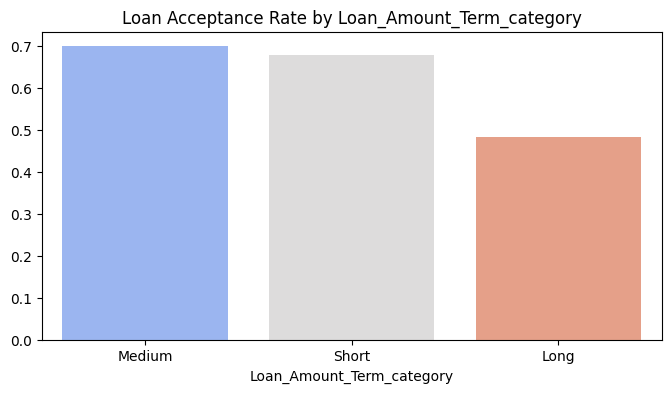

In [93]:
# Barplot graph Reflect the Loan Acceptance Rate by each level of Loan_Amount_Term_category.
plt.figure(figsize=(8, 4))
sns.barplot(x=Loan_Status_by_Loan_Amount_Term_category.index, y=Loan_Status_by_Loan_Amount_Term_category.values, palette='coolwarm')
plt.title('Loan Acceptance Rate by Loan_Amount_Term_category')

* medium-term loans have the highest approval rate at 69.94%, followed by short-term loans at 67.86%. However, long-term loans exhibit a significantly lower approval rate of 48.28%. 
* This suggests that applicants with medium-term and short-term loan durations are more likely to have their loans approved compared to those applying for long-term loans.

In [94]:
# 11. What is the impact of Credit_History on Loan acceptance Status?
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [95]:
# Getting loan_Status rate by each level of Credit_History to determine which level have greater effect on Loan acceptance.
Loan_Status_by_Credit_History = df.groupby("Credit_History")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_Credit_History

Credit_History
1.0    0.795789
0.0    0.078652
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan status by Credit_History')

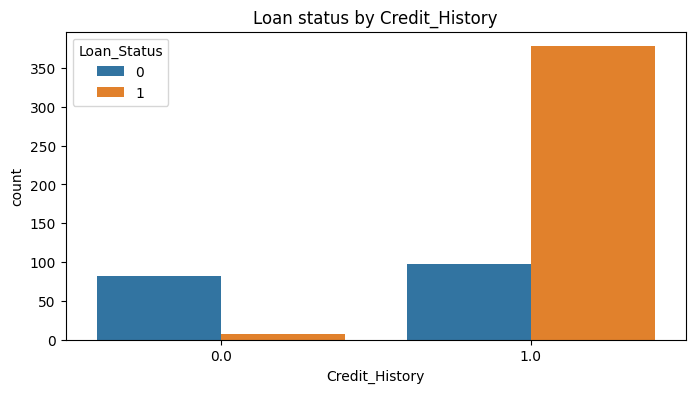

In [96]:
# Count plot graph Reflect the Loan status as hue by each level of Credit_History.
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Credit_History', hue = 'Loan_Status')
plt.title('Loan status by Credit_History')

* Applicants with a Credit_History of 1.0 have a significantly higher loan approval rate of 79.58%.
* In contrast, applicants with a Credit_History of 0.0 have a much lower approval rate of 7.87%.
* This highlights the crucial role of Credit_History in loan approval decisions, with a positive credit history strongly associated with higher loan approval rates.

In [97]:
# 11. What is the impact of Property_Area on Loan acceptance Status?
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [98]:
# Getting loan_Status rate by each level of Property_Area to determine which level have greater effect on Loan acceptance.
Loan_Status_by_Property_Area = df.groupby("Property_Area")['Loan_Status'].mean().sort_values(ascending=False)
Loan_Status_by_Property_Area

Property_Area
Semiurban    0.768240
Urban        0.658416
Rural        0.614525
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan status by Property_Area')

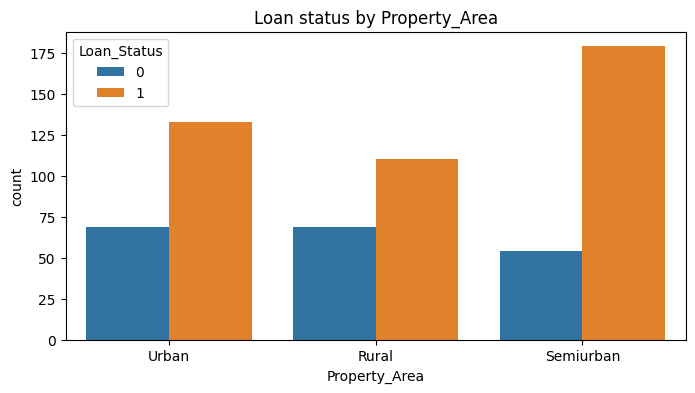

In [99]:
# Count plot graph Reflect the Loan status as hue by each level of Property_Area.
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Property_Area', hue = 'Loan_Status')
plt.title('Loan status by Property_Area')

* Applicants plan to residing  in Semiurban areas exhibit the highest loan approval rate at 76.82%.
* Urban areas follow with a moderate approval rate of 65.84%.
* Rural areas have the lowest approval rate at 61.45%.
* This suggests that property location, as categorized by Property_Area, influences loan approval rates, with Semiurban areas showing the highest likelihood of loan approval compared to Urban and Rural areas.

## Analysis Sumary:
### As a summary, we can say that applicants applying for a house loan with the following characteristics have a chance of acceptance or rejection as follows:

* If they are married, have 2 or 0 dependents, have a high level of education or are graduates, fall into the medium or large CoapplicantIncome_category (greater than 1188), apply for a medium or small loan amount (less than or equal to 168,000), choose a medium or short loan term (less than or equal to 360 months), meet the credit history guidelines (Credit_History == 1), and apply for a property area in a semi-urban area, applicants with these characteristics have a greater chance of loan approval or acceptance.
-----------
 * If they are not married, have 1 or 3 dependents, have a low level of education or are not graduates, fall into the small CoapplicantIncome_category (less than or equal to 1188), apply for a large loan amount (greater than 168,000), choose a long loan term (greater than 360 months), do not meet the credit history guidelines (Credit_History == 0), and apply for a property area in a rural area, applicants with these characteristics have a greater chance of their loan not being approved or not accepted.

## Step 4: Preprocessing & Modeling

1. Removing Irrelevant Columns:
2. Dividing the data set to features (x) and the target (y)
3. Handling missing values and Encode categorical columns
4. scaler
5. deaing with target class imbalances.
6. modeling and cross validation
7. Hyperparameter Tuning for best selected Model. 

In [100]:
# Importing necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline
from category_encoders import BinaryEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV

import joblib

### 1. Removing unnecessary Irrelevant Columns:

* like: Loan_ID, Income_per_Dependent, total_income, ApplicantIncome_category, CoapplicantIncome_category, total_income_category, LoanAmount_category, Loan_Amount_Term

In [101]:
# dropping irrelevant columns
df.drop(['Loan_ID', 'Income_per_Dependent', 'total_income', 'ApplicantIncome_category', 'CoapplicantIncome_category', 'total_income_category', 'LoanAmount_category','Loan_Amount_Term'],axis=1, inplace=True)

In [102]:
#checking for duplication in data 
df.duplicated().sum()

0

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     601 non-null    object 
 1   Married                    611 non-null    object 
 2   Dependents                 599 non-null    float64
 3   Education                  614 non-null    object 
 4   Self_Employed              582 non-null    object 
 5   ApplicantIncome            614 non-null    int64  
 6   CoapplicantIncome          614 non-null    float64
 7   LoanAmount                 592 non-null    float64
 8   Credit_History             564 non-null    float64
 9   Property_Area              614 non-null    object 
 10  Loan_Status                614 non-null    int32  
 11  Loan_Amount_Term_category  614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


### 2. Dividing the data set to features (x) and the target (y)

In [104]:
x = df.drop('Loan_Status',axis=1)
y = df.Loan_Status

In [105]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [106]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term_category
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,1.0,Urban,Medium
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,1.0,Rural,Medium
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Medium
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Medium
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,1.0,Urban,Medium


### 3.,4. Handling missing values, Encode categorical columns, and Scaling numerical values

In [107]:
x.isnull().sum()

Gender                       13
Married                       3
Dependents                   15
Education                     0
Self_Employed                32
ApplicantIncome               0
CoapplicantIncome             0
LoanAmount                   22
Credit_History               50
Property_Area                 0
Loan_Amount_Term_category     0
dtype: int64

In [108]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     601 non-null    object 
 1   Married                    611 non-null    object 
 2   Dependents                 599 non-null    float64
 3   Education                  614 non-null    object 
 4   Self_Employed              582 non-null    object 
 5   ApplicantIncome            614 non-null    int64  
 6   CoapplicantIncome          614 non-null    float64
 7   LoanAmount                 592 non-null    float64
 8   Credit_History             564 non-null    float64
 9   Property_Area              614 non-null    object 
 10  Loan_Amount_Term_category  614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [109]:
# Creating Categorical columns list
cat_col = x.select_dtypes(include=['object']).columns.tolist()
cat_col

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Amount_Term_category']

In [110]:
# Creating numerical columns list
num_col = x.select_dtypes(include=[np.number]).columns.tolist()
num_col

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History']

In [111]:
# Making pipeline for Categorical feature, and Numerical Feature
Cat_pip = Pipeline([('Mode_imputer', SimpleImputer(strategy='most_frequent',add_indicator=False)),
                    ('OHE', OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'))])
                       
numirc_pip = Pipeline([('Median_imputer', SimpleImputer(strategy='median', add_indicator=False)),
                      ('Scaler', StandardScaler())])
                   

In [112]:
# usining Column trasformer to categorical and numerical pip line
preprocesser = ColumnTransformer(transformers=[
    ('Cat_pip', Cat_pip, cat_col),
    ('numirc_pip', numirc_pip, num_col),
], remainder='passthrough')

In [113]:
# checking preprocesser out come
pd.DataFrame(preprocesser.fit_transform(x))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.737806,0.072991,-0.554487,-0.211241,0.411733
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.253470,-0.134412,-0.038732,-0.211241,0.411733
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.737806,-0.393747,-0.554487,-0.948996,0.411733
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.737806,-0.462062,0.251980,-0.306435,0.411733
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.737806,0.097728,-0.554487,-0.056551,0.411733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.737806,-0.410130,-0.554487,-0.889500,0.411733
610,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.236021,-0.212557,-0.554487,-1.258378,0.411733
611,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.253470,0.437174,-0.472404,1.276168,0.411733
612,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.244745,0.357064,-0.554487,0.490816,0.411733


In [114]:
# checking preprocesser out come
pd.DataFrame(preprocesser.fit_transform(x)).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

### 5., 6. deaing with target class imbalances, and modeling and cross validation

In [115]:
# Creating list of models to compare between them
models = []
models.append(("LR", LogisticRegression()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("XGC", XGBClassifier()))

In [116]:
# Creating pipe line using encoder and RobustScaler() as the numerical features like cost for two contains outliers.
for model in models:
    steps = []
    steps.append(('Preprocesser', preprocesser))
    steps.append(('Over_Sampler', RandomOverSampler()))
    steps.append(model)
    pipline = Pipeline(steps=steps)
    scoring = {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)}  
    res = cross_validate(pipline, x,y, cv=5, scoring=scoring, return_train_score=True)
    print(f"Model {model[0]} train acc is {res['train_accuracy'].mean()}")
    print(f"Model {model[0]} test acc is {res['test_accuracy'].mean()}")
    print(f"Model {model[0]} test precision is {res['test_precision'].mean()}")
    print(f"Model {model[0]} test recall is {res['test_recall'].mean()}")
    print("*" * 100)

Model LR train acc is 0.776060967330651
Model LR test acc is 0.7540450486472078
Model LR test precision is 0.8016566377346607
Model LR test recall is 0.8552941176470588
****************************************************************************************************
Model DTC train acc is 1.0
Model DTC test acc is 0.7036518725842996
Model DTC test precision is 0.7874277047544761
Model DTC test recall is 0.781904761904762
****************************************************************************************************
Model KNN train acc is 0.8106701107744275
Model KNN test acc is 0.6970145275223244
Model KNN test precision is 0.8030350253543828
Model KNN test recall is 0.7438375350140056
****************************************************************************************************
Model RF train acc is 1.0
Model RF test acc is 0.7622284419565508
Model RF test precision is 0.7907530639253564
Model RF test recall is 0.8910364145658264
*****************************************

* From the above scores Logistic Regression show better accuracy result during testing and not facing over fitting like Random Forest Xgboost classifer model. we are going to select it.

### 7. Hyperparameter Tuning for best selected Model

In [117]:
# Selecting Logistic Regression Model in pipeline
steps = []
steps.append(('Preprocesser', preprocesser))
steps.append(('Over_Sampler', RandomOverSampler()))
steps.append(('Model', LogisticRegression()))
pipeline = Pipeline(steps=steps)

In [118]:
# Define parameters to tune
param_grid = {
    'Model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'Model__solver': ['liblinear', 'lbfgs'],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline , cv = 5 ,param_grid=param_grid, scoring="accuracy" , return_train_score=True)

In [119]:
# Fitting grid search to the data
result = grid_search.fit(x,y)

In [120]:
result.cv_results_["mean_train_score"].mean()

0.7941479144934016

In [121]:
result.cv_results_["mean_test_score"].mean()

0.776433870896086

In [122]:
result.best_params_

{'Model__C': 0.001, 'Model__solver': 'liblinear'}

* After hyper parameter tuinig the both train and test score increse: 
   - mean_train_score from 77.6 % to 79.4 %
   - mean_test_score from 75.4 % to 77.64 %   

In [123]:
# Creating final Model object
Final_Model = result.best_estimator_

In [124]:
# Fittin Final Model with best parameter and estimator.
Final_Model.fit(x,y)

Pipeline(steps=[('Preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat_pip',
                                                  Pipeline(steps=[('Mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area',
                                                   'Loan_Am

In [125]:
## Visualize Final Model Pipline
from sklearn import set_config

In [126]:
set_config(display="diagram")

In [127]:
# Visualize Final_Model as diagram
Final_Model

Pipeline(steps=[('Preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat_pip',
                                                  Pipeline(steps=[('Mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area',
                                                   'Loan_Amount_Term_category']),
                                                 ('numirc_pip',
                                                  Pipeline(steps=[('Median_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Credit_History'])])),
                ('Over_Sampler', RandomOverSampler()),
                ('Model', LogisticRegression(C=0.001, solver='liblinear'))])

### 9. Model Saving 

In [128]:
Features = x.columns.to_list()
Features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Property_Area',
 'Loan_Amount_Term_category']

In [129]:
# using joblib to dump the model and features names
joblib.dump(Final_Model , "Model.pkl")
joblib.dump(Features , "Features.pkl")

['Features.pkl']

In [130]:
x.Loan_Amount_Term_category.value_counts()

Medium    529
Short      56
Long       29
Name: Loan_Amount_Term_category, dtype: int64

## Final Step Deployment 

In [136]:
%%writefile app.py

# Importing necessary libraries
import streamlit as st
import pandas as pd
import joblib
import sklearn
import imblearn

# Loading Model & feature name in:
model = joblib.load("Model.pkl")
feature_in = joblib.load("Features.pkl")

# Creating Prediction Function:
def prediction(Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,
               LoanAmount,Credit_History,Property_Area,Loan_Amount_Term_category):
    
    # Creating data frame recive user input and deliver input to the model for preduction
    df = pd.DataFrame(columns=feature_in)
    df.at[0,'Gender'] = Gender
    df.at[0,'Married'] = Married
    df.at[0,'Dependents'] = Dependents
    df.at[0,'Education'] = Education
    df.at[0,'Self_Employed'] = Self_Employed
    df.at[0,'ApplicantIncome'] = ApplicantIncome
    df.at[0,'CoapplicantIncome'] = CoapplicantIncome
    df.at[0,'LoanAmount'] = LoanAmount
    df.at[0,'Credit_History'] = Credit_History
    df.at[0,'Property_Area'] = Property_Area
    df.at[0,'Loan_Amount_Term_category'] = Loan_Amount_Term_category
    
    result = model.predict(df)
    return result[0]
    
    
# Creating a main function involves designing a user interface for feature input using Streamlit. 
# Based on the input provided by the user, the model will make predictions.
def main():
    st.title("Loan Status Prediction Model")
    st.text("The model shows an accuracy score of approximately 77.6% for loan approval status \nduring testing.")
    st.text('''Analysis Sumary:\n
As a summary, we can say that applicants applying for a house loan with the\nfollowing characteristics have a chance of acceptance or rejection as follows:

* If they are married, have 2 or 0 dependents, have a high level of education or \ngraduates, fall into the medium or large CoapplicantIncome_category \n(greater than 1188), apply for a medium or small loan amount (less than or equal \nto 168,000), choose a medium or short loan term (less than or equal to 360 months), \nmeet the credit history guidelines (Credit_History == 1), and apply for a property \narea in a semi-urban area, applicants with these characteristics have a greater \nchance of loan approval or acceptance.\n
* If they are not married, have 1 or 3 dependents, have a low level of education \nor are not graduates, fall into the small CoapplicantIncome_category \n(less than or equal to 1188), apply for a large loan amount (greater than 168,000), \nchoose a long loan term (greater than 360 months), do not meet the credit history \nguidelines (Credit_History == 0), and apply for a property area in a rural area, \napplicants with these characteristics have a greater chance of their loan not being \napproved or not accepted.''')
    Gender = st.selectbox('Applicant Gender',['Male','Female'])
    Married = st.selectbox('Married Status', ['Yes','No'])
    Dependents = st.selectbox("Select Number of Dependents (*Notice: The maximum number '3' indicates '3 or more'.)", [0,1,2,3])
    Education = st.selectbox("Education Status", ['Graduate','Not Graduate'])
    Self_Employed = st.selectbox("Self_Employed Status",['No','Yes'])
    ApplicantIncome = st.number_input("Enter Applicant Income")
    CoapplicantIncome = st.number_input("Enter Coapplicant Income")
    LoanAmount = st.slider("Enter Loan Amont in Thousands", min_value=5, max_value=800, value= 100, step=1)
    Credit_History = st.selectbox("Enter Credit_History Status", [1,0])
    Property_Area = st.selectbox("Enter Property Area", ['Semiurban','Urban','Rural'])
    Loan_Amount_Term_category = st.selectbox('''Enter Loan Term Period:
    Short: ≤ 180 Months, Medium: 180 < Months ≤ 360, Long: > 360 Months''', ['Short','Medium','Long'])
    
    if st.button("Predict"):
        Results = prediction(Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,
               LoanAmount,Credit_History,Property_Area,Loan_Amount_Term_category)
        loan_status_list = ["Sorry Your Loan Request Rejected" , "Your Loan Request Accepted"]
        st.text(loan_status_list[Results])

main()

Overwriting app.py


## Project online link for GitHub and Stream lit

#### Project GitHub link: https://github.com/DiaaAldein/Loan-Status---Data-Analysis-and-Predictive-Modeling

#### Project online Deployment on streamlit:
#### Streamlit link: https://loan-status---data-analysis-and-predictive-modeling-7ehpneoxdw.streamlit.app/